**<h1> Pillow Library (PIL)</h1>**


Image processing and computer vision tasks include displaying, cropping, flipping, rotating,  image segmentation, classification, image restoration,  image recognition, image generation.  Also, working with images via the cloud requires storing, transmitting, and gathering images through the internet. 

Python is an excellent choice as it has many image processing tools, computer vision and artificial intelligence libraries. Finally, it has many libraries for working with files in the cloud and on the internet.


## User defined function

First, let's define a helper function to concatenate two images side-by-side. You will not need to understand the code below at this moment, but this function will be used repeatedly in this tutorial to showcase the results.


In [32]:
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

## Image Files and Paths  


An image is stored as a file on your computer. Below, we define `my_image` as the filename of a file in this directory.


In [2]:
my_image = "lenna.png"

A filename consists of two parts: the name of the file and the extension, separated by a full stop (`.`). The extension specifies the format of the Image. There are two popular image formats: Joint Photographic Expert Group image (or `.jpg`, `.jpeg`) and Portable Network Graphics (or `.png`). These file types make it simpler to work with images. For example, it compresses the image, taking less spaces on your drive to store the image.


Image files are stored in the file system of your computer. The location of it is specified using a "path", which is often unique. You can find the path of your current working directory with Python's `os` module. The `os` module provides functions to interact with the file system, e.g. creating or removing a directory (folder), listing its contents, changing and identifying the current working directory. 


In [3]:
import os
cwd = os.getcwd()
cwd 

'C:\\Users\\Ben Ashael'

The "path" to an image can be found using the following line of code.


In [4]:
image_path = os.path.join(cwd, my_image)
image_path

'C:\\Users\\Ben Ashael\\lenna.png'

## Loading Images in Python


Pillow (PIL) library is a popular library for loading images in Python. In addition, many other libraries such as "Keras" and "PyTorch" use this library to work with images. The `Image` module provides functions to load images from and saving images to the file system. Let's import it from `PIL`.


In [5]:
from PIL import Image

If the image is in the current working directory, you can load the image as follows using the image's filename and create a PIL Image object:


In [7]:
image = Image.open(my_image)
type(image)

PIL.GifImagePlugin.GifImageFile

If you are working in a Jupyter environment, you can view the image by calling the variable itself.  


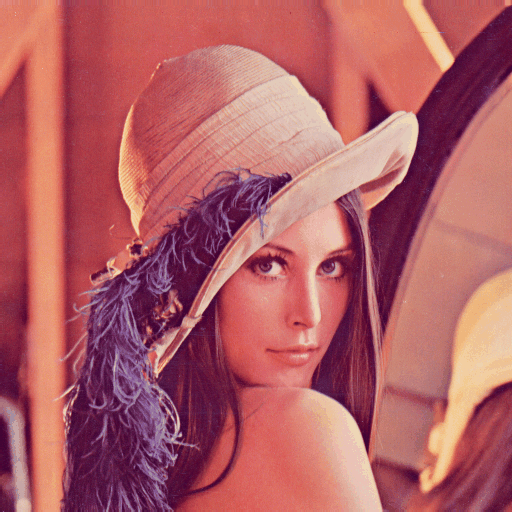

In [8]:
image

##  Plotting an Image 


We can also use the method `show` of PIL objects to display the image. Please note this method may or may not work depending on your setup.


In [9]:
image.show()

You can also use <code>imshow</code> method from the <code>matplotlib</code> library to display the image.


In [10]:
import matplotlib.pyplot as plt

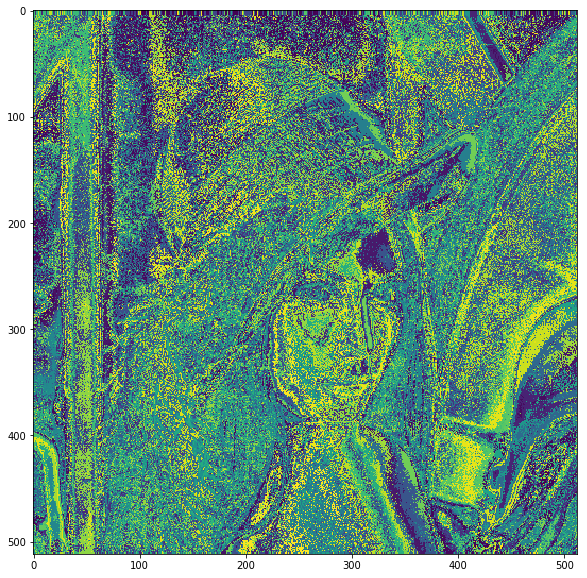

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

You can also load the image using its full path. This comes in handy if the image is not in your working directory.


In [12]:
image = Image.open(image_path)

We can use the attributes of the image object to get information. The attribute format is the extension or format of the image.


The attribute `size` returns a tuple, the first element is the number of pixels that comprise the width and the second element is the number of pixels that make up the height of the image.   


In [13]:
print(image.size)

(512, 512)


This is a string specifying the pixel format used. In this case, it's “RGB”. RGB is a color space where red, green, and blue are added together to produce other colors.



In [14]:
print(image.mode)

P


The `Image.open` method does not load image data into the computer memory. The `load` method of `PIL` object reads the file content, decodes it, and expands the image into memory.


In [15]:
im = image.load() 

We can then check the intensity of the image at the $x$-th column and $y$-th row:


In [16]:
x = 0
y = 1
im[y,x]

172

## Grayscale Images, Quantization and Color Channels  


### Grayscale Images


The `ImageOps` module contains several ‘ready-made’ image processing operations. This module is somewhat experimental, and most operators only work with grayscale and/or RGB images.


In [19]:
from PIL import ImageOps 

Grayscale images have pixel values representing the amount of light or intensity of that pixel. Light shades of gray have a high-intensity while darker shades have a lower intensity, i.e, white has the highest intensity and black the lowest.


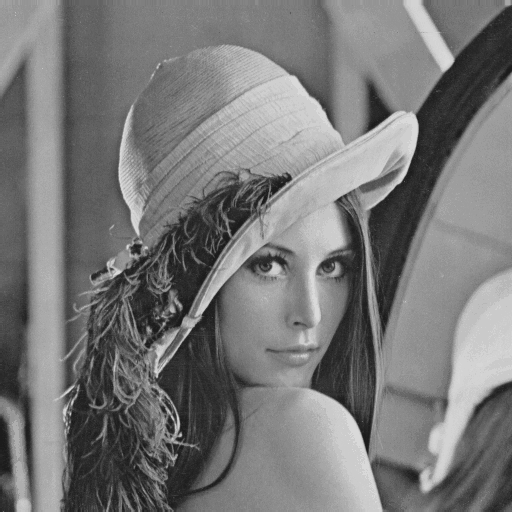

In [20]:
image_gray = ImageOps.grayscale(image) 
image_gray 

The mode is `L` for grayscale.


In [21]:
image_gray.mode

'L'

### Quantization


The Quantization of an image is the number of unique intensity values any given pixel of the image can take. For a grayscale image, this means the number of different shades of gray. Most images have 256 different levels. You can decrease the levels using the method `quantize`. Let's repeatably cut the number of levels in half and observe what happens:


Half the levels do not make a noticable difference.


In [22]:
image_gray.quantize(256 // 2)
image_gray.show()

Let’s continue dividing the number of values by two and compare it to the original image.


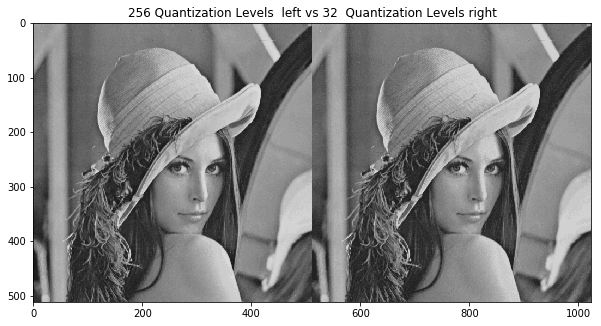

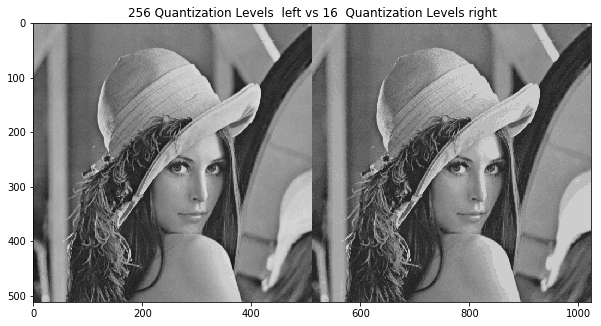

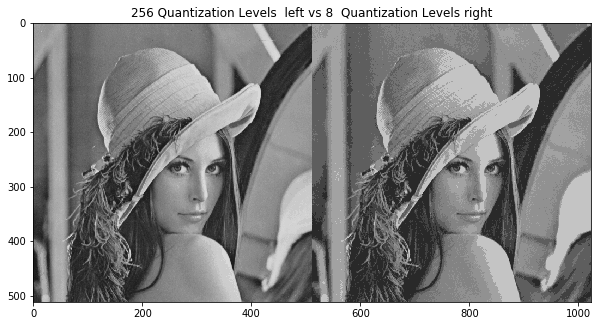

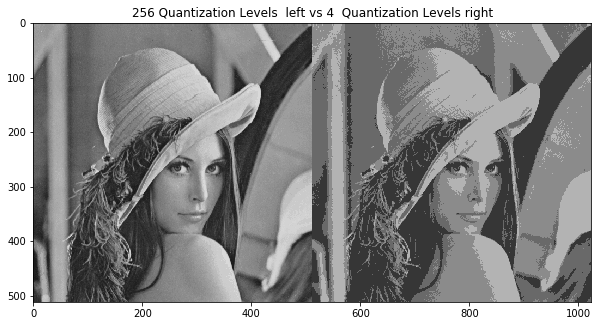

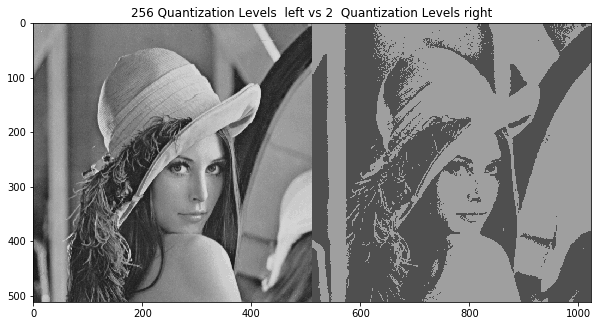

In [28]:
#get_concat_h(image_gray,  image_gray.quantize(256//2)).show(title="Lena") 
for n in range(3,8):
    plt.figure(figsize=(10,10))

    plt.imshow(get_concat_h(image_gray,  image_gray.quantize(256//2**n))) 
    plt.title("256 Quantization Levels  left vs {}  Quantization Levels right".format(256//2**n))
    plt.show()

### Color Channels  


We can also work with the different color channels. Consider the following image:


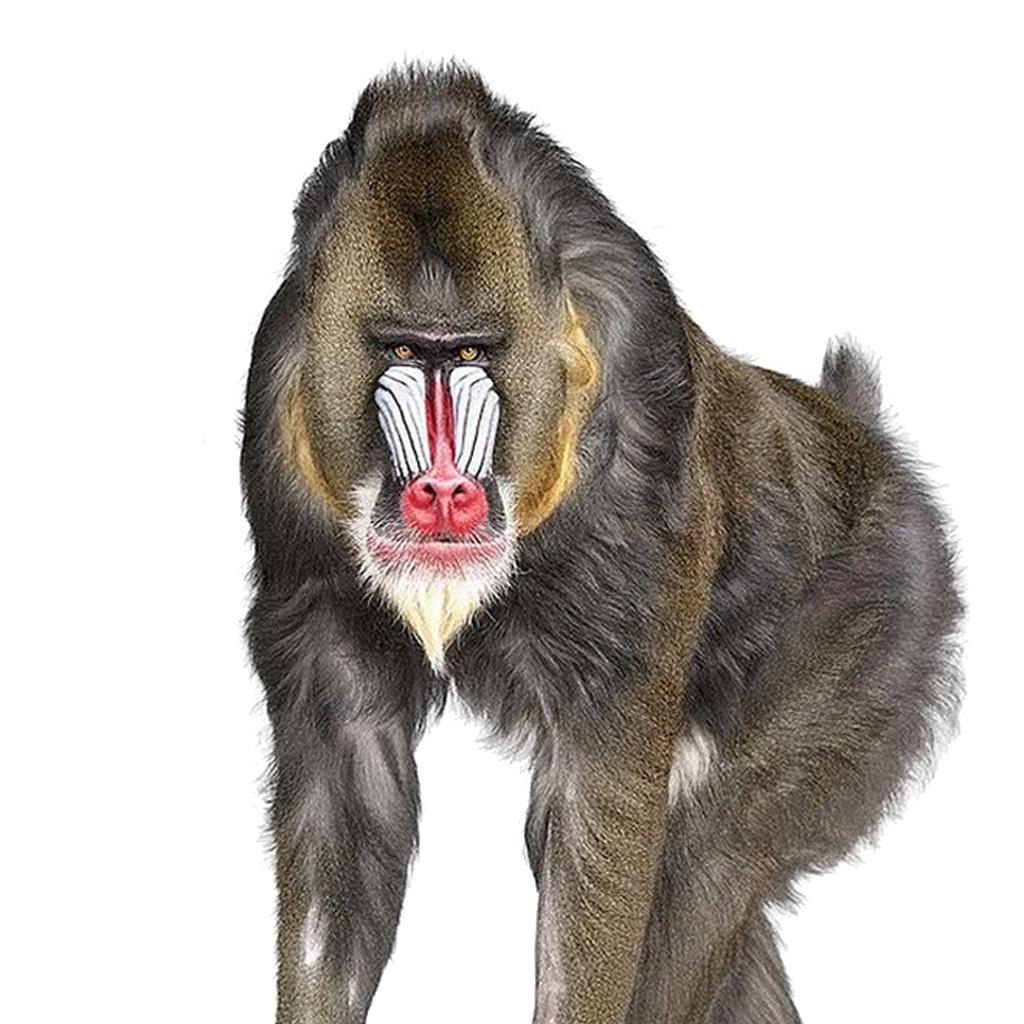

In [29]:
baboon = Image.open('baboon.png')
baboon

We can obtain the different RGB color channels and assign them to the variables <code>red</code>, <code>green</code>, and <code>blue</code>:


In [37]:
red = baboon.split()

In [38]:
green = baboon.split()

In [42]:
blue = baboon.split()

In [73]:
red

(<PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987C7048>,
 <PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987C7080>,
 <PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987C70B8>,
 <PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987C70F0>)

In [74]:
green

(<PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987A7E48>,
 <PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987A7C88>,
 <PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987A7860>,
 <PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987A76A0>)

In [75]:
blue

(<PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987A7DA0>,
 <PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987A7898>,
 <PIL.Image.Image image mode=L size=1024x1024 at 0x2AF987A72B0>,
 <PIL.Image.Image image mode=L size=1024x1024 at 0x2AF985EA160>)

Plotting the color image next to the red channel as a grayscale, we see that regions with red have higher intensity values.


## PIL Images into NumPy Arrays


NumPy is a library for Python, allowing you to work with multi-dimensional arrays and matrices. We can convert a PIL image to a NumPy array. We use <code>asarray()</code> or <code>array</code> function from NumPy to convert PIL images into NumPy arrays. 

First, let's import the numpy module:


In [46]:
import numpy as np

We apply it to the <code>PIL</code> image we get a numpy array:


In [47]:
array= np.asarray(image)
print(type(array))

<class 'numpy.ndarray'>


`np.asarray` turns the original image into a numpy array. Often, we don't want to manipulate the image directly, but instead, create a copy of the image to manipulate. The `np.array` method creates a new copy of the image, such that the original one will remain unmodified.


In [48]:
array = np.array(image)

The attribute  <code>shape</code> of a `numpy.array` object returns a tuple corresponding to the dimensions of it, the first element gives the number of rows or height of the image,  the second is element is the number of columns or width of the image. The final element is the number of colour channels.


In [49]:
# summarize shape
print(array.shape)

(512, 512)


or <code>(rows, columns, colors)</code>. Each element in the color axis  corresponds to the following value  <code>(R, G, B)</code> format.


We can view the intensity values by printing out the array, they range from 0 to 255 or $2^{8}$ (8-bit).


In [50]:
print(array)

[[172 172  29 ...  82 140   3]
 [172 172  29 ...  82 140   3]
 [172 172  29 ...  82 140   3]
 ...
 [119 119 218 ...  63  12 112]
 [119 119 161 ...   7   7 151]
 [119 119 161 ...   7   7 151]]


The Intensity values are  8-bit unsigned datatype.


In [51]:
array[0, 0]

172

We can find the maximum and minimum intensity value of the array:      


In [52]:
array.min()

0

In [53]:
array.max()

254

### Indexing  


You can plot the array as an image:


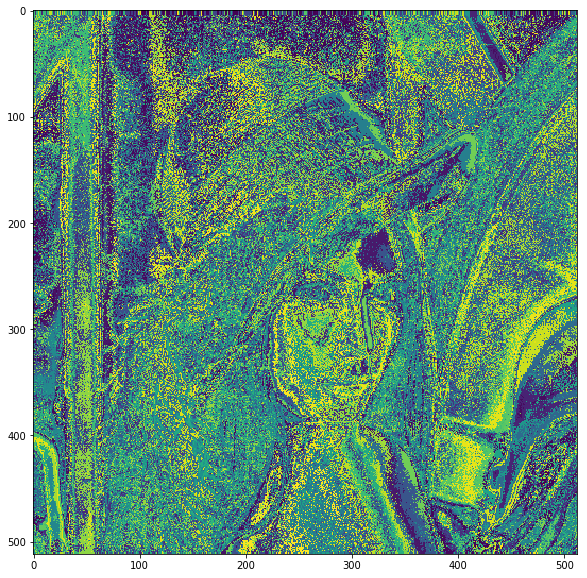

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(array)
plt.show()

We can use numpy slicing, for example, we can return the first 256 rows corresponding to the top half of the image:


In [55]:
rows = 256

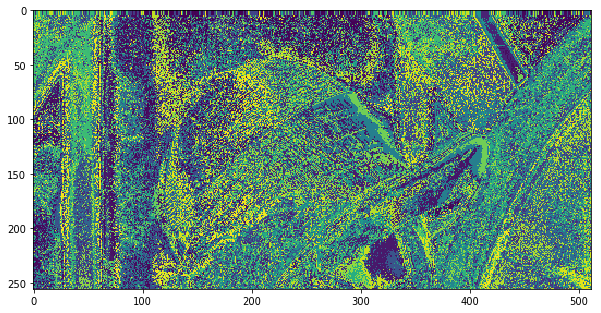

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(array[0:rows,:])
plt.show()

We can also return the first 256 columns corresponding to the first half of the image.


In [58]:
columns = 256

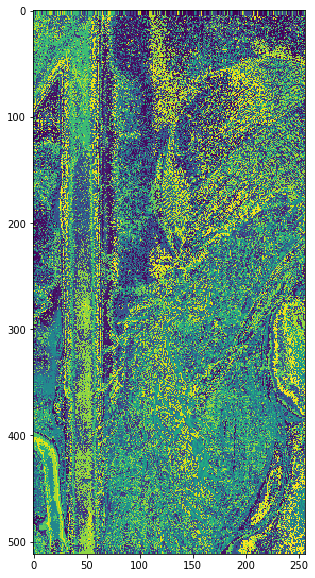

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(array[:,0:columns])
plt.show()

If you want to reassign an array to another variable, you should use the `copy` method (we will cover this in the next section).


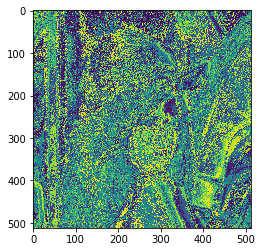

In [61]:
A = array.copy()
plt.imshow(A)
plt.show()

If we do not apply the method copy(), the variable will point to the same location in memory. Consider the array B. If we set all values of array A to zero, as B points to A, the values of B will be zero too:


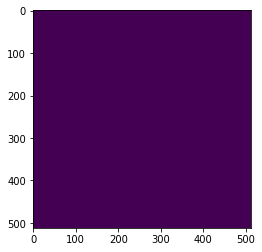

In [63]:
B = A
A[:,:] = 0
plt.imshow(B)
plt.show()

We can also work with the different color channels. Consider the baboon image: 


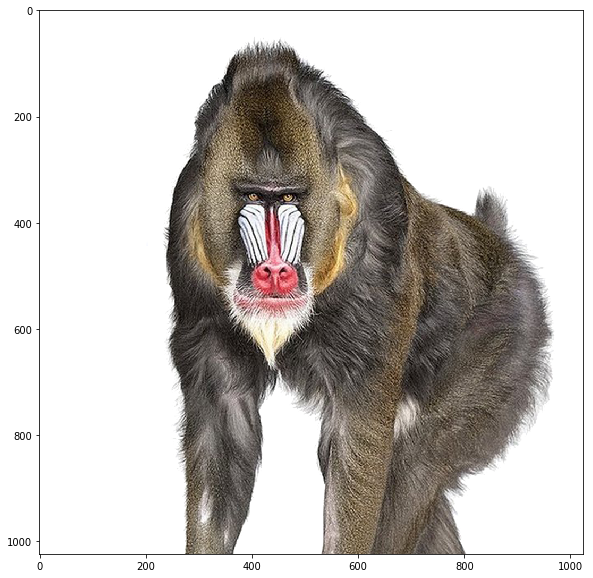

In [65]:
baboon_array = np.array(baboon)
plt.figure(figsize=(10,10))
plt.imshow(baboon_array)
plt.show()

We can plot the red channel as intensity values of the red channel.


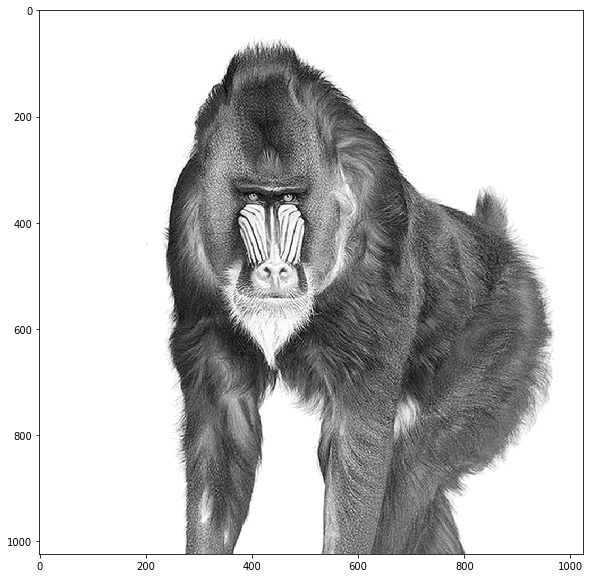

In [66]:
baboon_array = np.array(baboon)
plt.figure(figsize=(10,10))
plt.imshow(baboon_array[:,:,0], cmap='gray')
plt.show()

Or we can create a new array and set all but the red color channels to zero. Therefore, when we display the image it appears red:


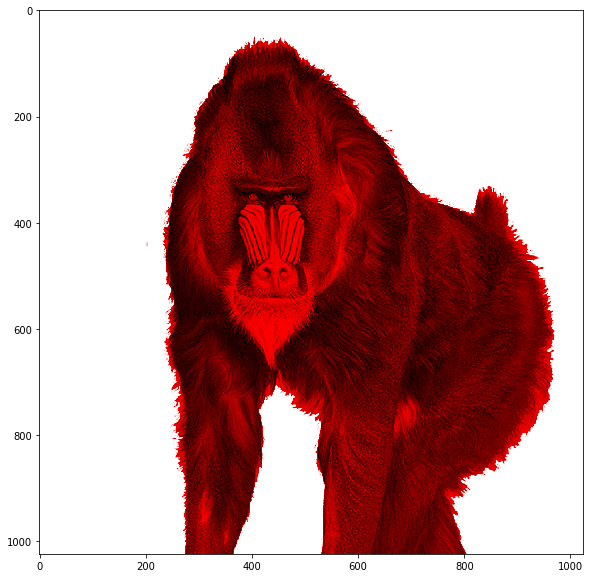

In [67]:
baboon_red=baboon_array.copy()
baboon_red[:,:,1] = 0
baboon_red[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_red)
plt.show()

We can do the same for blue:


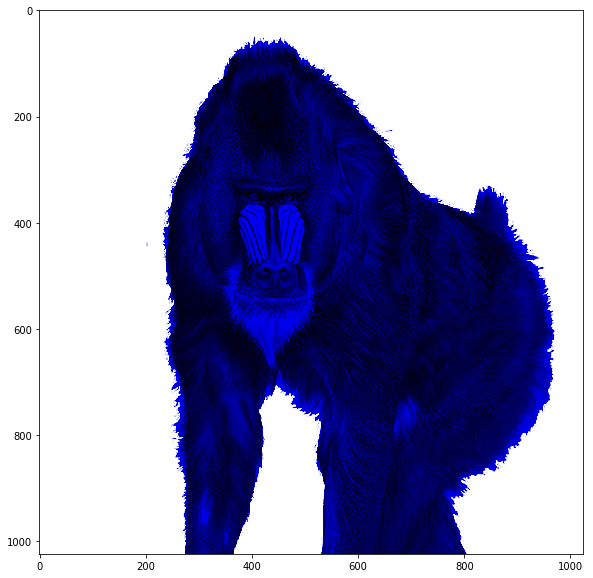

In [68]:
baboon_blue=baboon_array.copy()
baboon_blue[:,:,0] = 0
baboon_blue[:,:,1] = 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_blue)
plt.show()

## Appendix

Open the image and create a PIL Image object called `blue_lenna`, convert the image into a numpy array we can manipulate called `blue_array`, get the blue channel out of it, and finally plot the image


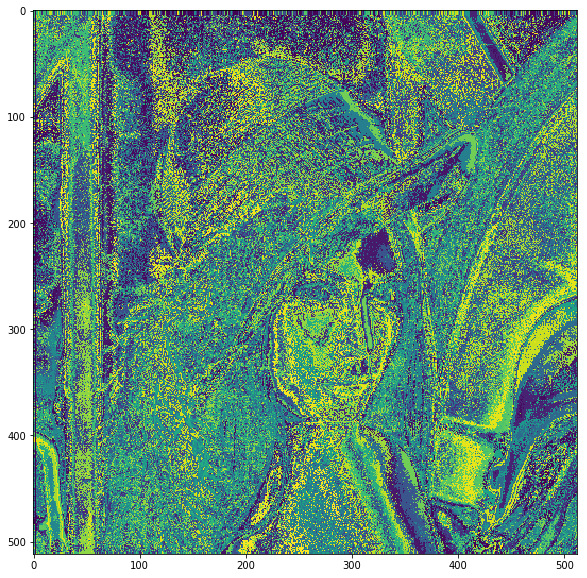

In [70]:
blue_lenna = Image.open('lenna.png')
blue_array = np.array(blue_lenna)
blue_array[:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(blue_array)
plt.show()